In [ ]:
from datasets import load_dataset
import pandas as pd
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
df = pd.read_csv('/Users/pckiousis/Downloads/Greek_Parliament_Proceedings_1989_2019.csv')
df.head(5)

/Users/pckiousis/subtask2_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,speaker_info,speech
0,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...
1,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...
2,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,"Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ..."
3,NaN,1989-07-03,period 5,session 1,sitting 1,βουλη,βουλευτης/ες,"Μάλιστα, μάλιστα."
4,κρητικος νικολαου παναγιωτης,1989-07-03,period 5,session 1,sitting 1,πανελληνιο σοσιαλιστικο κινημα,προεδρευων,Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...


In [ ]:
len(df)

1194407

In [ ]:
df.iloc[0].speech

' Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να συνοδεύσει το Μακαριότατο Αρχιεπίσκοπο Αθηνών και πάσης Ελλάδος κ. ΣΕΡΑΦΕΙΜ και τα συνοδεύοντα αυτόν μέλη της Ιεράς Συνόδου κατά την είσοδό τους στην Αίθουσα της Βουλής, προκειμένου να τελεσθεί αγιασμός.  . Στη συνέχεια τελείται ο καθιερωμένος αγιασμός.'

 * On the next we are going to follow the setup represented in the https://arxiv.org/pdf/2501.12826 paper and get 175 random samples. Firstly we are bound to create an annotation schema , in which title,abstract,intent,event and speech will be represented

In [ ]:
sample_df = df[['speech']].dropna().sample(175, random_state=42).reset_index(drop=True)


In [ ]:
sample_df['τίτλος'] = ''
sample_df['περίληψη'] = ''
sample_df['πρόθεση'] = ''
sample_df['γεγονός'] = ''

In [ ]:
sample_df = sample_df[['speech', 'τίτλος', 'περίληψη', 'πρόθεση', 'γεγονός']]

In [ ]:
sample_df.to_csv('krikri_annot_sample_175.csv')


In [ ]:



df = pd.read_csv("krikri_annot_sample_175.csv")


chunk_size = 30


for i, start in enumerate(range(0, len(df), chunk_size)):
    chunk = df.iloc[start:start + chunk_size]
    chunk.to_csv(f"krikri_chunk_{i+1}.csv", index=False)

print("✅ Το αρχείο χωρίστηκε επιτυχώς σε τμήματα των 30 εγγραφών.")


✅ Το αρχείο χωρίστηκε επιτυχώς σε τμήματα των 30 εγγραφών.


In [ ]:
sample_df.iloc[31].speech

' Εγώ θα ήθελα πάρα πολύ να μπορέσουμε να κοιτάξουμε μπροστά μας και να μην κοιτάζουμε πίσω. Αλλά, θα παρακαλέσω να μην μας κάνετε εσείς κριτική μιας πολιτικής την οποία δε διαμορφώσαμε εμείς.'

In [ ]:
import pandas as pd
df175 = pd.read_csv('labeled_175_samples.csv',sep=";")

In [ ]:
df175['speech'] = df175['speech'].astype(str).str.replace(r'^"(.*)"$', r'\1', regex=True)

df175.to_csv('labeled_175_cleaned.csv', sep=',', index=False)


In [ ]:
len(df175)

175

In [ ]:
print(df175.iloc[9].speech)

Το κατάλαβα και το αντελήφθην πάρα πολύ καλά. Σας πληροφορώ ότι μία από τις χειρότερες μορφές υποδούλωσης και κατάργησης της ίδιας της εσωτερικής ελευθερίας του ατόμου, είναι τα ναρκωτικά. Επομένως, περίμενα πραγματικά ένα νέο εργαλείο που γίνεται σε ευρωπαϊκό επίπεδο για την αντιμετώπιση της μάστιγας των ναρκωτικών, ότι αυτό το εργαλείο θα το στηρίζατε και σεις σ' αυτήν την Αίθουσα. Για τις δύο συμβάσεις διμερούς αστυνομικής συνεργασίας νομίζω ότι δεν υπάρχουν προβλήματα. Είναι συμβάσεις κλασικές, υπεγράφησαν από την προηγούμενη κυβέρνηση. Αφορούν διμερή αστυνομική συνεργασία για το οργανωμένο έγκλημα και για θέματα λαθρομετανάστευσης. Με την Πολωνία και την Ουγγαρία. Μ' αυτές τις δύο χώρες θέλω να πληροφορήσω το Σώμα ότι δεν έχουμε πράγματι ιδιαίτερα προβλήματα λαθρομετανάστευσης, έχουν όμως ιδιαίτερη για μας σημασία λόγω της θέσης τους. Και εμείς εκφράζοντας τη συνέχεια του κράτους και της πολιτείας φέρνουμε για κύρωση τις συμβάσεις, που υπέγραψε η προηγούμενη κυβέρνηση και έκανε σω

In [1]:
import pandas as pd
df175 = pd.read_csv("labeled_175_cleaned.csv")


print(df175.columns)
df175.head()


Index(['speech', 'τίτλος', 'περίληψη', 'πρόθεση', 'γεγονός'], dtype='object')


,speech,τίτλος,περίληψη,πρόθεση,γεγονός
0,Παρών.,Δήλωση παρουσίας,Ο βουλευτής δηλώνει την παρουσία του κατά την ...,διαδικαστικό,καταγραφή παρουσιών
1,Κατά πλειοψηφία.,Απόφαση κατά πλειοψηφία,Ανακοίνωση ότι η απόφαση ελήφθη με πλειοψηφία.,ανακοίνωση,ψήφιση
2,Το λόγο έχει ο Υπουργός κ. Λιάπης.,Ανάθεση λόγου σε Υπουργό,Ο Πρόεδρος δίνει το λόγο στον Υπουργό για παρέ...,διαδικαστικό,παραχώρηση λόγου
3,Ναι.,Θετική ψήφος,Ο βουλευτής δηλώνει τη θετική του ψήφο.,ψηφοφορία,απάντηση ψήφου
4,"Δεκτό, δεκτό.",Έγκριση πρότασης,Ο Πρόεδρος ανακοινώνει την αποδοχή πρότασης ή ...,αποδοχή,αποδοχή


In [2]:
speeches_intents=pd.read_csv("speech_intent_dataset.csv")
speeches_intents.head(5)

,speech,πρόθεση
0,Παρών.,διαδικαστικό
1,Κατά πλειοψηφία.,ανακοίνωση
2,Το λόγο έχει ο Υπουργός κ. Λιάπης.,διαδικαστικό
3,Ναι.,ψηφοφορία
4,"Δεκτό, δεκτό.",αποδοχή


In [3]:
INTENTS=list(speeches_intents.πρόθεση.unique())
print(len(INTENTS))
print(INTENTS)

33
['διαδικαστικό', 'ανακοίνωση', 'ψηφοφορία', 'αποδοχή', 'πολιτική τοποθέτηση', 'αντιπαράθεση', 'ενημέρωση', 'αντίδραση', 'πληροφόρηση', 'υπεράσπιση', 'απόρριψη', 'διακοπή', 'αίτημα', 'διευκρίνιση', 'κατηγορία', 'κριτική', 'απάντηση', 'δήλωση θέσης', 'διευκόλυνση', 'ευαισθητοποίηση', 'άγνωστο', 'ερώτηση', 'παρέμβαση', 'στήριξη', 'καταγγελία', 'έναρξη ', 'διατήρηση ', 'ευχές ', 'αναμονή', 'άρνηση', 'σχόλιο', 'νομική διευκρίνιση ', 'υπενθύμιση']


In [16]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline


template = open("fewshot_prompt_template.txt", encoding="utf-8").read()
df = pd.read_csv("Mapped_Speech_Intents.csv")


df["prompt"] = df["speech"].apply(lambda x: template.replace("{speech}", x))


model_name = "ilsp/Llama-Krikri-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", torch_dtype="auto")
generator = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=5, return_full_text=False)

def clean_prediction(text):

    return text.strip().split()[0].split('\n')[0]

df["prediction"] = df["prompt"].apply(lambda x: clean_prediction(generator(x)[0]["generated_text"]))


df[["speech", "ευρεία_κατηγορία", "prediction"]].to_csv("krikri_fewshot_predictions.csv", index=False)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Device set to use cuda:0


In [19]:
valid_intents = [
    "διαδικασία", "ψήφος", "ανακοίνωση",
    "τοποθέτηση", "ερώτηση", "ενημέρωση"
]


df_clean = df[df["prediction"].isin(valid_intents)].copy()

df_clean = df_clean.dropna(subset=["ευρεία_κατηγορία", "prediction"])
df_clean = df_clean[(df_clean["ευρεία_κατηγορία"] != "") & (df_clean["prediction"] != "")]


In [20]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true=df_clean["ευρεία_κατηγορία"],
    y_pred=df_clean["prediction"],
    digits=2,
    zero_division=0
))


              precision    recall  f1-score   support

  ανακοίνωση       0.75      0.67      0.71        18
  διαδικασία       0.69      0.84      0.76        32
   ενημέρωση       0.40      0.17      0.24        12
     ερώτηση       0.39      0.64      0.48        11
  τοποθέτηση       0.67      0.69      0.68        58
       ψήφος       0.75      0.40      0.52        15

    accuracy                           0.64       146
   macro avg       0.61      0.57      0.56       146
weighted avg       0.65      0.64      0.63       146



In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


labels = ["διαδικασία", "ψήφος", "ανακοίνωση", "τοποθέτηση", "ερώτηση", "ενημέρωση"]


cm = confusion_matrix(
    y_true=df_clean["ευρεία_κατηγορία"],
    y_pred=df_clean["prediction"],
    labels=labels
)


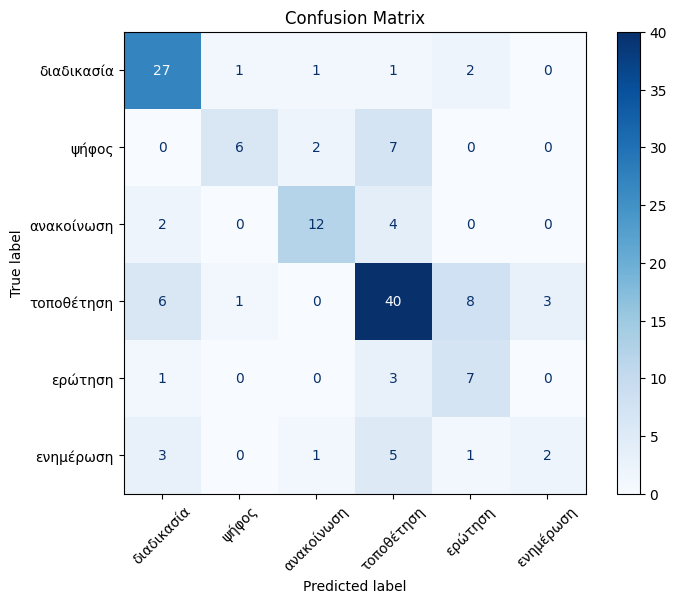

In [22]:
import matplotlib.pyplot as plt


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()
